# Lab 05 Prelab

## Ohm's Law, Plots, and Models

Ohm's law relates the electrical potential applied to a device ($V$) to the current that passes through it, $I$.
Ohm's law isn't really a physical law the way Newton's Law are, rather it is an empirical relation that does a good job of describing many devices or materials under specific ranges of circumstances. Ohm's law takes the form:

$$
V = IR.
$$

An example which will be of our interest is as follows. Consider the circuit below, where we have a voltage source (battery) of a variable voltage $V.$ The battery is connected to a resistor of some unknown, but fixed resistance $R$. We have access to tools to measure the voltage $V$ (using a voltmeter) across the resistor as well as the current $I$ (using an ammeter) in the circuit, for a range of voltages $V$. How can we go about extracting the resistance $R$?

<center><img src="circuit.png" width="180" height="240"/></center>

Given multiple datapoints $(V_1 \pm u[V_1], I_1 \pm u[I_1]), (V_2 \pm u[V_2], I_2 \pm u[I_2]), \ldots (V_n \pm u[V_n], I_n \pm u[I_n])$, a useful way to visualize the relationship (and extract information from the relationship) is by plotting the two variables against each other. We have done so below for a mock dataset of voltages and currents.

<center><img src="CurrentvsVoltage.png" width="500" height="325"/></center>

**Question 1:** What is the relationship between voltage and current as shown in the experimental data above? What is the relationship predicted by Ohm's law? Do the two agree? How is the slope of the above plot related to the resistance $R$ of the resistor? Finally, estimate the circuit resistance given the plot above.

This issue is one of great general interest in science. We may have two variables which are related (here the potential $V$ and current $I$ through a circuit) and a model that describes how they may be related (here, Ohm's law). What we can do as experimentalists is to collect data of the two variables and try to fit a model to them; from this we may extract parameters of interest (here, the resistance of our circuit), as well as evaluate how good the model is at describing the phenomena we see.

To this end, an important first step is that of data visualization; how do we produce such plots? Fortunately, python is an excellent medium for this task. The rest of this pre-lab will be walking through how to produce a scatterplot of experimental data, which we will be doing time and time again for future experiments in this lab.

## Plotting with Python

Much like with the case of recording data in tables, plotting is not a native functionality of python; instead, we import a library which carries this functionality. In this case, the library of interest is `matplotlib`. You can import it (along with the data_entry and numpy libraries we have been using) by running the cell below.

In [27]:
import data_entry
import numpy as np
import matplotlib.pyplot as plt

We will go through an example together of creating a scatterplot, and then at the end we will ask you to take what you've learned to recreate the scatter plot we showed in the beginning of the notebook. For our example together, we consider an example akin to the very first experiment in the lab. We suppose that we have some spring, and we have measured the force the spring exerts $F$ for a variety of compressions $\Delta x$. The data is given in the spreadsheet below:

In [28]:
de = data_entry.sheet("lab05_prelab_data1")

Sheet name: lab05_prelab_data1.csv


We will want to work with vectors of this data, so click the `Generate Vectors` button in the spreadsheet. First, let's do a barebones plot of the datapoints of force vs. displacement and nothing else. You can create that by running the cell below:

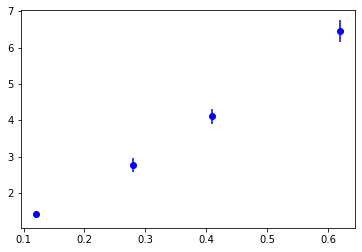

In [29]:
plt.errorbar(dxVec, FVec, uFVec, fmt='bo')
plt.show()

To explain what is going on here, we use `plt` to specify that we want to be using the `matplotlib` plotting library. We then use the `plt.errorbar` function to specify that we want a plot with error bars. The first argument we give it is the data for the x-axis, the second argument is the data for the y-axis, and the third argument is the error bars for the y-axis data (we will often find that the errors in the y-values are more significant than those on the x-values, so the x errors can often be neglected). `fmt='bo'` specifies that we want blue dots (os) for the datapoints (you could have red x's if you replaced bo with rx). Finally, the `plt.show()` at the end displays the plot.

Now that we have a barebones plot, let's start adding some elements; in particular, we will want to add axis labels, as well as a title. We will also show how to adjust the size of the markers in the plot and then add a legend (though this plot doesn't really need one).  These are done below.

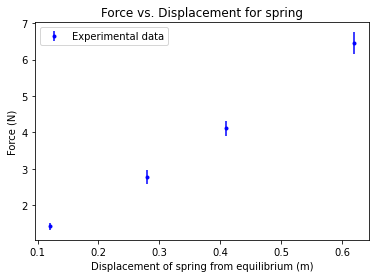

In [30]:
plt.errorbar(dxVec, FVec, uFVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

We now have a complete plot! Notice that the plot title describes what is being plotted against what (y quantity plotted vs. x quantity), and the axis labels describe the quantities (with the units) on each axis. You can experiment with what you want to write for the title/axis labels to be by changing the text inside the "..." found in the `plt.title("..."), plt.xlabel("..."),` and `plt.ylabel("...")`functions in the cell above.

The `markersize = ...` argument in `plt.errorbar` specifies how large the markers in the plot are. In the first version of the plot above, the error bars of the first datapoint were hidden behind the marker; we have here shrunk the size of the markers to make this visible.

Finally, by providing a `label="..."` argument to `plt.errorbar`, we can specify the label for the plot when we include a legend with `plt.legend()`. We don't really need a legend here as we are only plotting a single dataset, but later on when we have multiple things on the same plot, a legend will become very useful.

Note that the plot will (usually) automatically give reasonable axis ticks, and set appropriate limits for the plot so all of the datapoints can be displayed. If you find the defaults aren't suitable, there are ways to control these (eg `plt.xlim([min, max])` and `plt.xticks([.1, .2, .3])`), though you probably won't need those in this course.

**Question 2** What can you physically infer about the slope of the plot above? Recall that Hooke's law tells us that $F = k \Delta x$. 

## Adding a model

We've seen how to plot data. We will often want to add a line or curve to a plot to judge how well a model describes the experimental results. To this, we break the process into four steps:
1. Find the range of x values that the data spans
2. Generate a bunch x values over the range of x values. We'll use to calculate the model prediction. Why a whole bunch of points? For a straight line the number of points used doesn't matter much, but if the model predicts a more complicated function, using many points will give a smooth curve.
3. Calculate the model prediction at each of the x values
4. Plot the model prediction on the graph.

See the code below for an example.

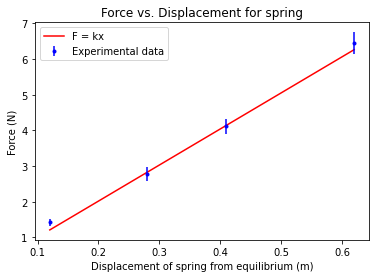

In [31]:
# Step 1: find the limits of the data:
xmin = np.min(dxVec) # use the np.min function to find the smallest x value
xmax = np.max(dxVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values:
slope = 10.1 # Estimate of the slope.
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "F = kx")

# What's below is exactly what we had earlier:
plt.errorbar(dxVec, FVec, uFVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Force vs. Displacement for spring")
plt.xlabel("Displacement of spring from equilibrium (m)")
plt.ylabel("Force (N)")
plt.legend()
plt.show()

A few things to note:
1. The results of all `plt.plot()` and `plt.errorbar()` functions will appear on the same plot, until there is a `plt.show()` (or the cell ends).
2. The syntax for `plt.plot()` is a little different from `plt.errorbar().` For `plt.errorbar()` you need `fmt='bo'`, but for `plt.plot()` the format for plotting can't include the `fmt=` piece.


## Plotting with Python - Your turn! 

**Question 3** Now that we've gone through an example together, see if you can follow the same steps as above to create the current vs. voltage plot including labels and title, that we saw at the beginning of the notebook. The data you need is provided below.

In [16]:
de = data_entry.sheet("lab05_prelab_data2")

Sheet name: lab05_prelab_data2.csv
